In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Ignore deprecation warnings
import warnings
warnings.filterwarnings("ignore")

## Data Loading and Exploration

In [3]:
# Import libraries
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [4]:
# Read data
df = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
# Basic info
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


(5110, 12)

In [6]:
# Descriptive statistics
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Data Preprocessing

In [7]:
# Check null values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<Axes: xlabel='gender', ylabel='bmi'>

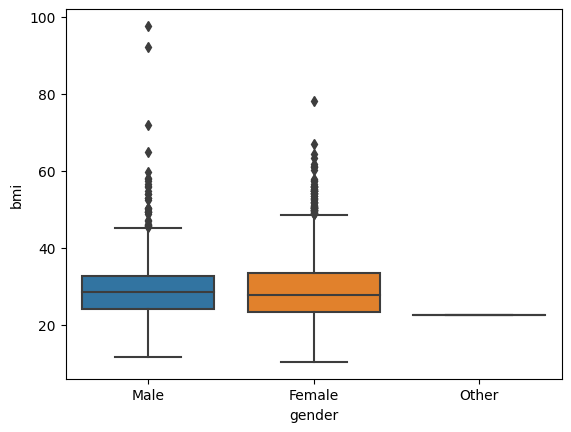

In [8]:
# Boxplot gender to see if it informs the BMI
sns.boxplot(x = df['gender'], y = df['bmi'])

<Axes: xlabel='bmi', ylabel='age'>

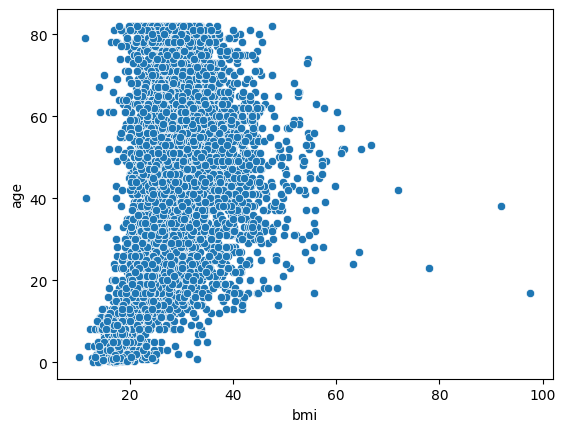

In [9]:
# Scatterplot age to see if it informs the BMI
sns.scatterplot(data = df, x = 'bmi', y = 'age')

In [10]:
# Classify into age groups
age_group = []

for i in df['age']:
    if i < 13.0:
        age_group.append('Child')
    elif i >= 13.0 and i <= 18.0:
        age_group.append('Teen')
    elif i >= 18.0 and i <= 60.0:
        age_group.append('Adult')
    else:
        age_group.append('Senior')

df['age_group'] = age_group
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Senior
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,Senior
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Senior
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Adult
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Senior


In [11]:
# Plot BMI ranges for age groups
fig = px.box(df, x = "age_group", y = "bmi", color = "gender")
fig.show()

In [12]:
# Impute values based on age groups and gender
def impute_bmi(cols, bmi_values):
    bmi, age_group, gender = cols
    if pd.isnull(bmi):
        return bmi_values.get((age_group, gender), 21.0)
    else:
        return bmi

bmi_mapping = {('Senior', 'Male'): 29.0, ('Senior', 'Female'): 28.9,
               ('Adult', 'Male'): 30.2, ('Adult', 'Female'): 28.8,
               ('Teen', 'Male'): 20.6, ('Teen', 'Female'): 21.8}

df['bmi'] = df[['bmi', 'age_group', 'gender']].apply(impute_bmi, axis = 1,
                                                     bmi_values = bmi_mapping)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Senior
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.9,never smoked,1,Senior
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Senior
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Adult
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Senior


In [13]:
# Verify null values
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
age_group            0
dtype: int64

## Exploratory Data Analysis

In [14]:
# Store columns into categorical and continuous lists
con_cols = ['age', 'avg_glucose_level', 'bmi']
cat_cols = []
for i in df.columns:
    if i != 'id' and i != 'stroke' and i not in con_cols:
        cat_cols.append(i)

In [15]:
# Check values in categorical columns
cat_cols.append('age_group')
for i in cat_cols:
    print(f'Values in {i}\n{df[i].value_counts()}\n')

Values in gender
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

Values in hypertension
hypertension
0    4612
1     498
Name: count, dtype: int64

Values in heart_disease
heart_disease
0    4834
1     276
Name: count, dtype: int64

Values in ever_married
ever_married
Yes    3353
No     1757
Name: count, dtype: int64

Values in work_type
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

Values in Residence_type
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

Values in smoking_status
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

Values in age_group
age_group
Adult     2890
Senior    1304
Child      588
Teen       328
Name: count, dtype: int64

Values in age_group
age_group
Adult     2890
Senior    1304
Child      588
Teen       328
Name: count, dtyp

In [16]:
# Drop the lone instance
df.drop(index = df[df['gender'] == 'Other'].index[0], axis = 0, inplace = True)

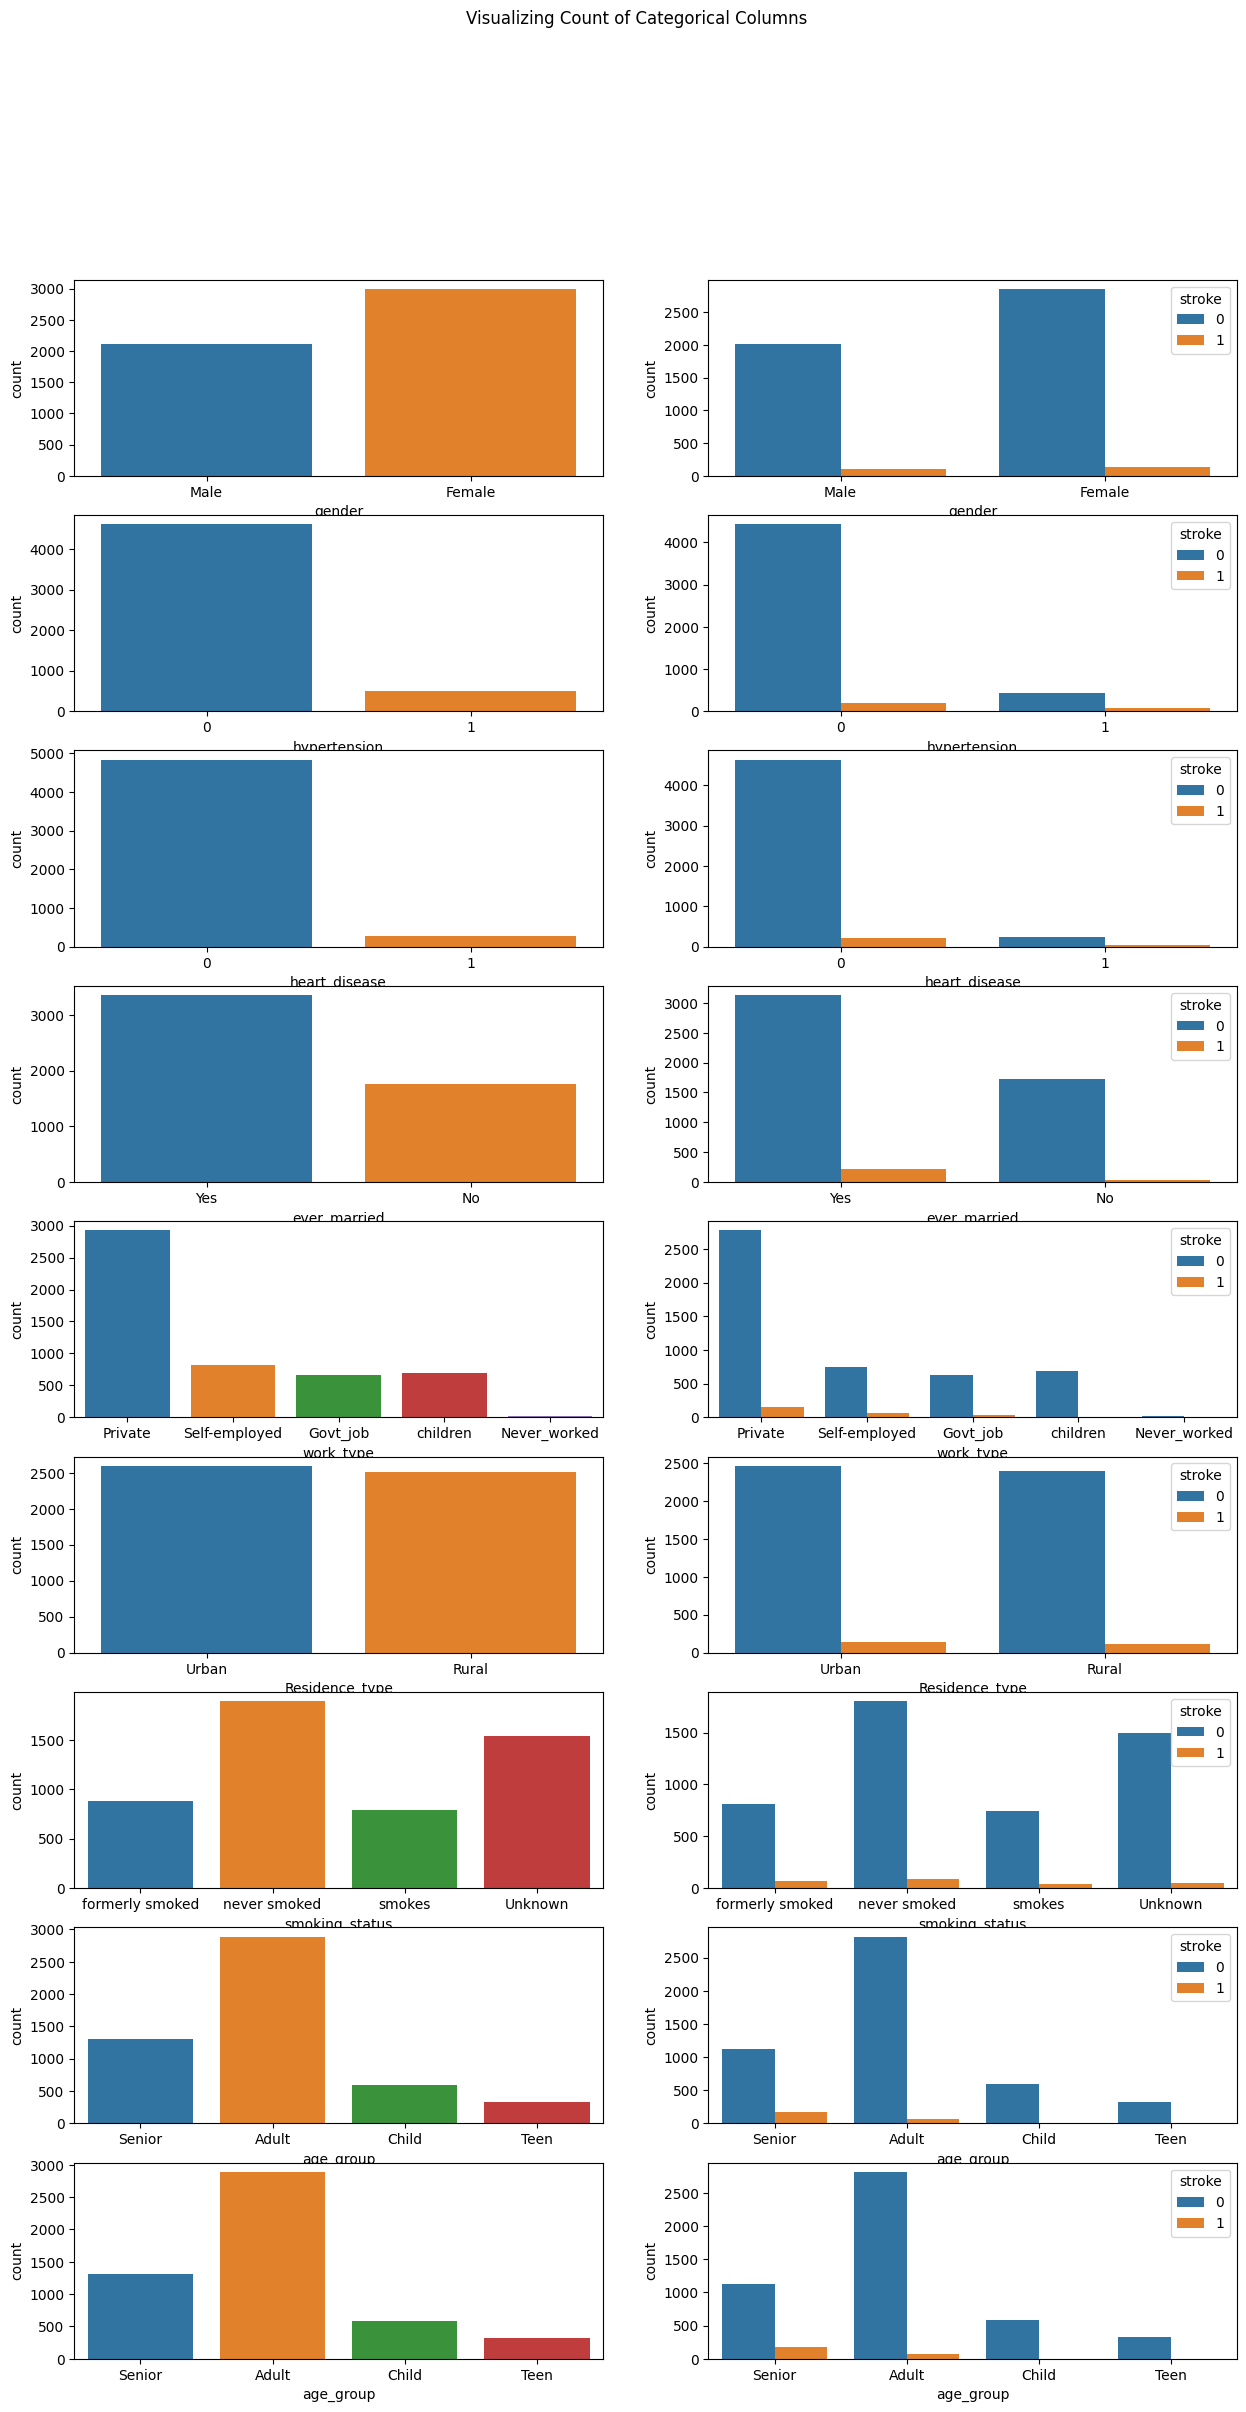

In [17]:
# Plot count of each category in categorical columns and comparing with 'stroke' status using subplots.
fig, ax = plt.subplots(len(cat_cols), 2, figsize = (15, len(cat_cols) * 3))
for index, i in enumerate(cat_cols):
    plt.suptitle("Visualizing Count of Categorical Columns")
    sns.countplot(data = df, x = i, ax = ax[index, 0])
    sns.countplot(data = df, x = i, ax = ax[index, 1], hue = 'stroke')

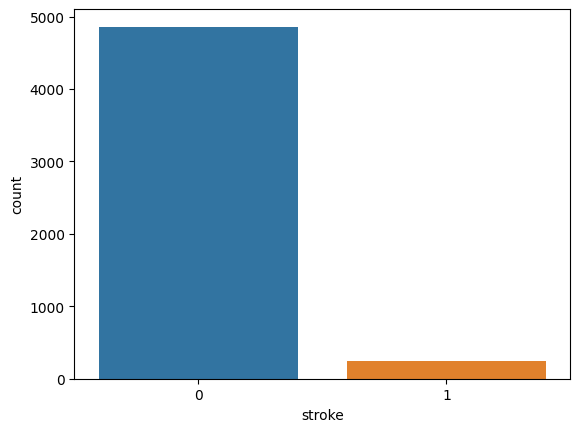

In [18]:
# Create count plot for 'stroke' column
sns.countplot(data = df, x = 'stroke')
plt.show()

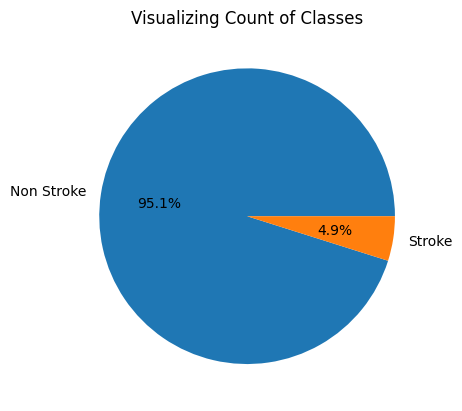

In [19]:
# Create pie chart for 'stroke' column
plt.title("Visualizing Count of Classes")
plt.pie(np.array(df['stroke'].value_counts()),
        labels = ['Non Stroke', 'Stroke'],
        autopct = '%1.1f%%')
plt.show()

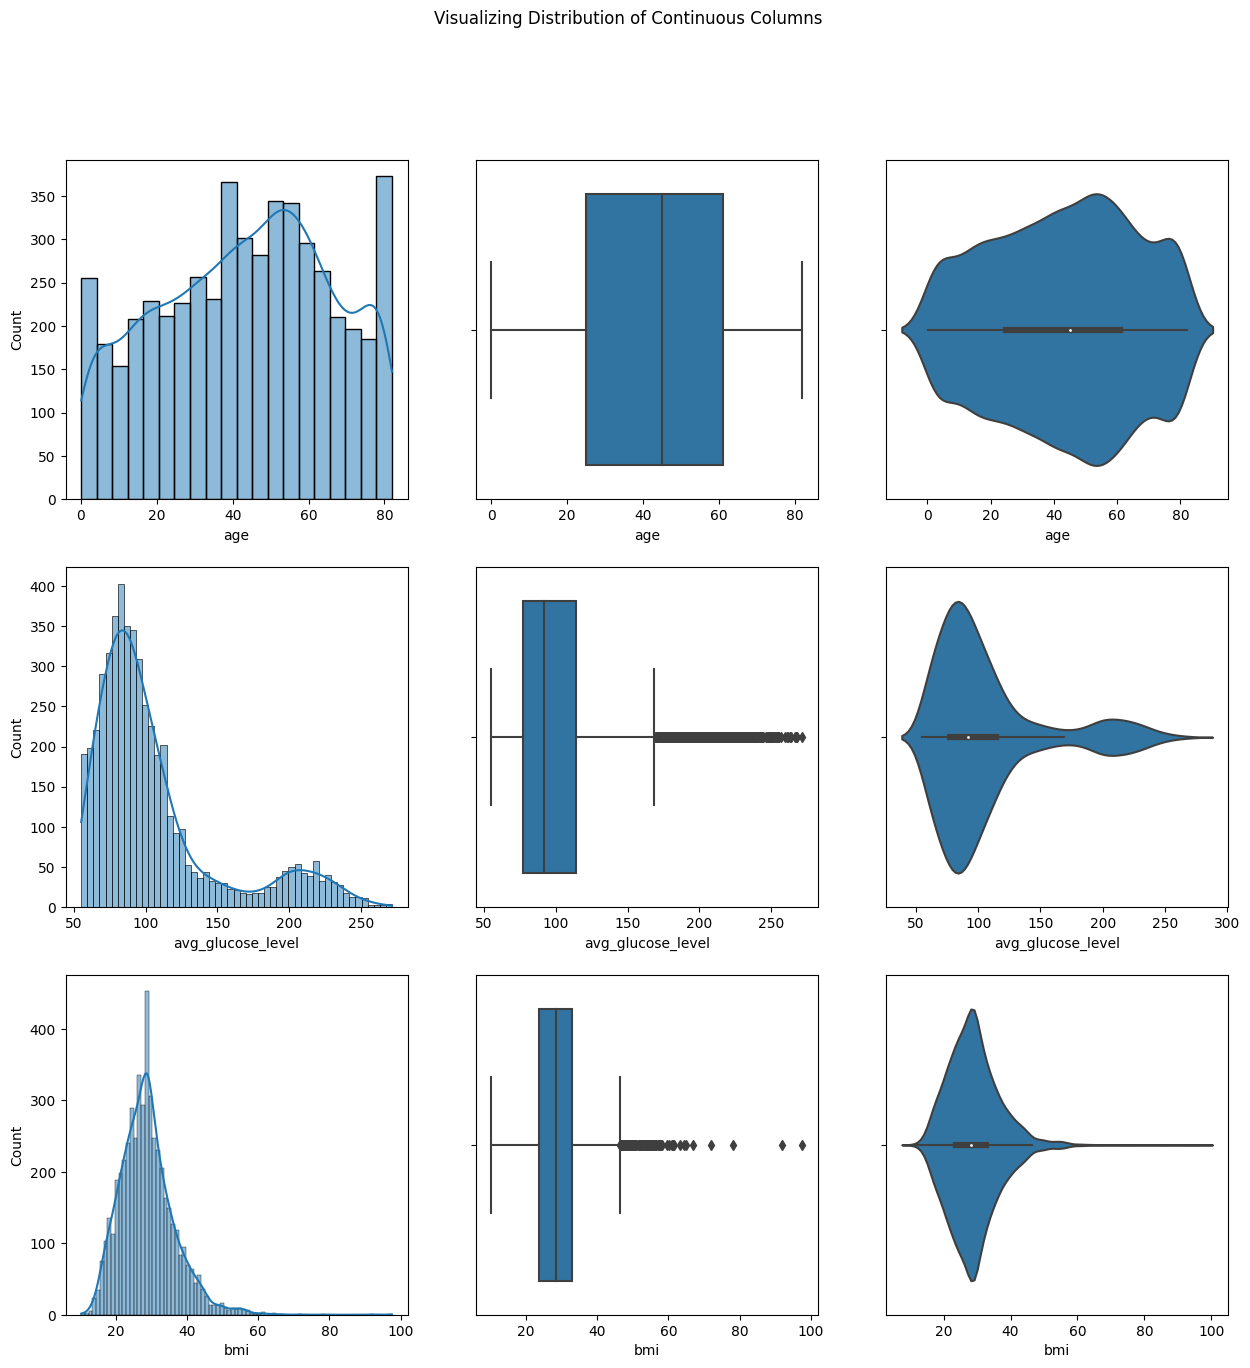

In [20]:
# Create boxplots, histplots, and violinplots for continuous columns
fig, ax = plt.subplots(3, 3, figsize = (15, 15))
for index, i in enumerate(con_cols):
    plt.suptitle("Visualizing Distribution of Continuous Columns")
    sns.boxplot(data = df, x = i,ax = ax[index, 1])
    sns.histplot(df[i], ax = ax[index, 0], kde = True)
    sns.violinplot(data = df, x = i,ax = ax[index, 2])

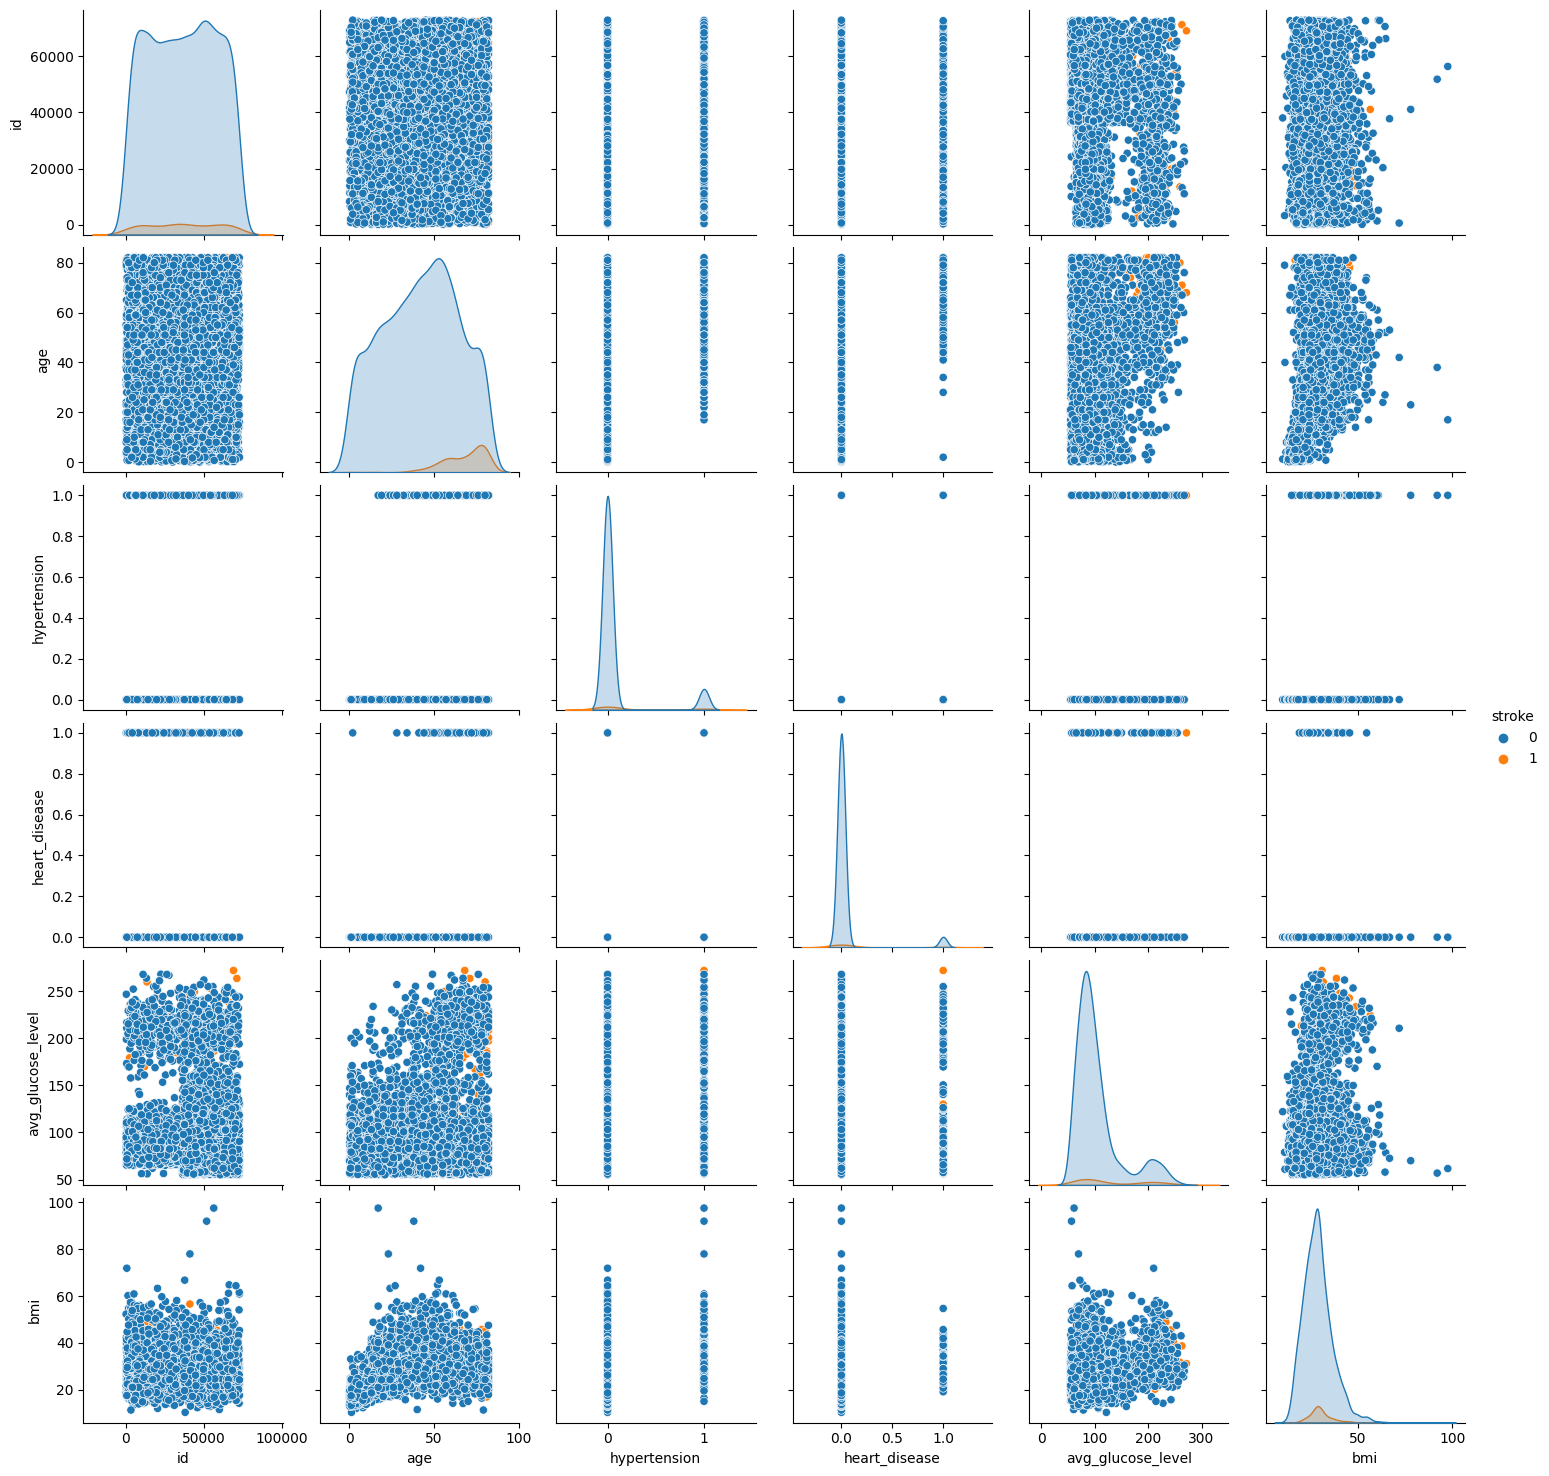

In [21]:
# Pair plot for pairwise relationships and distribution
sns.pairplot(data = df, hue = 'stroke')

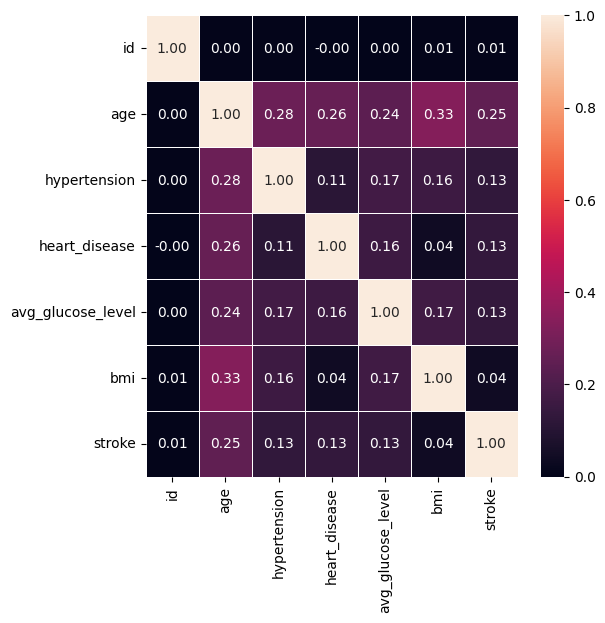

In [22]:
# Select only numeric columns from the dataframe
numeric_df = df.select_dtypes(include = ['float64', 'int64'])

# Heatmap the classes
plt.figure(figsize = (6, 6))
sns.heatmap(numeric_df.corr(), annot = True, linewidth = 0.5, fmt = '0.2f')
plt.show()

## Data Preprocessing

In [23]:
# Import libraries
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
# Encod3 categorical columns
cat_cols.pop()
df_enc = pd.get_dummies(df[cat_cols], drop_first = True)
df_enc.head()

,hypertension,heart_disease,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age_group_Child,age_group_Senior,age_group_Teen
0,0,1,True,True,False,True,False,False,True,True,False,False,False,True,False
1,0,0,False,True,False,False,True,False,False,False,True,False,False,True,False
2,0,1,True,True,False,True,False,False,False,False,True,False,False,True,False
3,0,0,False,True,False,True,False,False,True,False,False,True,False,False,False
4,1,0,False,True,False,False,True,False,False,False,True,False,False,True,False


In [25]:
# Encode categorical columns
df[df_enc.columns] = df_enc
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age_group_Child,age_group_Senior,age_group_Teen
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,...,True,False,False,True,True,False,False,False,True,False
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.9,...,False,True,False,False,False,True,False,False,True,False
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,...,True,False,False,False,False,True,False,False,True,False
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,...,True,False,False,True,False,False,True,False,False,False
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,...,False,True,False,False,False,True,False,False,True,False


In [26]:
# Encode categorical columns
df.drop(cat_cols, axis = 1, inplace = True)
df.head()

,id,age,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age_group_Child,age_group_Senior,age_group_Teen
0,9046,67.0,228.69,36.6,1,True,True,False,True,False,False,True,True,False,False,False,True,False
1,51676,61.0,202.21,28.9,1,False,True,False,False,True,False,False,False,True,False,False,True,False
2,31112,80.0,105.92,32.5,1,True,True,False,True,False,False,False,False,True,False,False,True,False
3,60182,49.0,171.23,34.4,1,False,True,False,True,False,False,True,False,False,True,False,False,False
4,1665,79.0,174.12,24.0,1,False,True,False,False,True,False,False,False,True,False,False,True,False


In [27]:
# Encode categorical columns
df_final = df.drop(['id'], axis = 1)
df_final.head()

,age,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age_group_Child,age_group_Senior,age_group_Teen
0,67.0,228.69,36.6,1,True,True,False,True,False,False,True,True,False,False,False,True,False
1,61.0,202.21,28.9,1,False,True,False,False,True,False,False,False,True,False,False,True,False
2,80.0,105.92,32.5,1,True,True,False,True,False,False,False,False,True,False,False,True,False
3,49.0,171.23,34.4,1,False,True,False,True,False,False,True,False,False,True,False,False,False
4,79.0,174.12,24.0,1,False,True,False,False,True,False,False,False,True,False,False,True,False


In [28]:
# Oversample minority class
oversample = RandomOverSampler(sampling_strategy='minority')
X=df_final.drop(['stroke'],axis=1)
y=df_final['stroke']
X_over, y_over = oversample.fit_resample(X, y)

In [29]:
# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over,
                                                    test_size = 0.3,
                                                    stratify = y_over,
                                                    random_state = 42)

In [30]:
# Scale numerical columns
scaler = StandardScaler()
X_train[con_cols] = scaler.fit_transform(X_train[con_cols])
X_test[con_cols] = scaler.transform(X_test[con_cols])
X_train.head()

,age,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age_group_Child,age_group_Senior,age_group_Teen
9192,-0.710062,-0.376864,0.025642,False,True,False,False,True,False,True,False,False,True,False,False,False
3629,0.142044,1.571194,1.459949,True,True,False,False,False,False,False,False,True,False,False,False,False
9526,1.173542,-0.723355,-1.437351,False,True,False,False,True,False,False,False,False,False,False,True,False
539,-0.530671,-0.684634,3.166775,False,True,False,True,False,False,False,False,False,False,False,False,False
5479,0.769913,-0.373955,-0.361621,False,True,False,True,False,False,False,False,False,True,False,True,False


## Model Building

### KNN Model

In [31]:
# Import libraries
import lightgbm as lgbm
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier

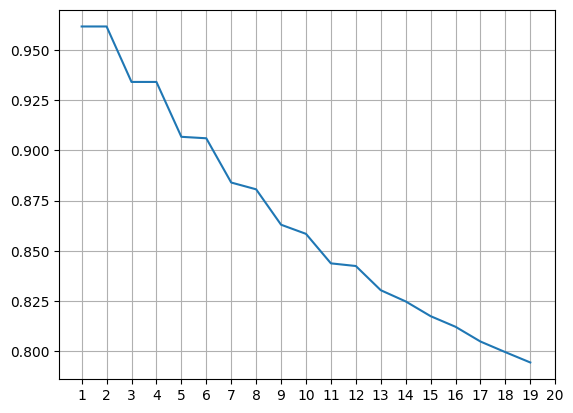

In [32]:
# KNN Classification Plot
knn_scores = []
for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X_train, y_train, cv = 5)
    knn_scores.append(scores.mean())

x_ticks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
x_labels = x_ticks

plt.plot([k for k in range(1, 20)], knn_scores)
plt.xticks(ticks = x_ticks, labels = x_labels)
plt.grid()

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1458
           1       0.95      1.00      0.97      1458

    accuracy                           0.97      2916
   macro avg       0.97      0.97      0.97      2916
weighted avg       0.97      0.97      0.97      2916



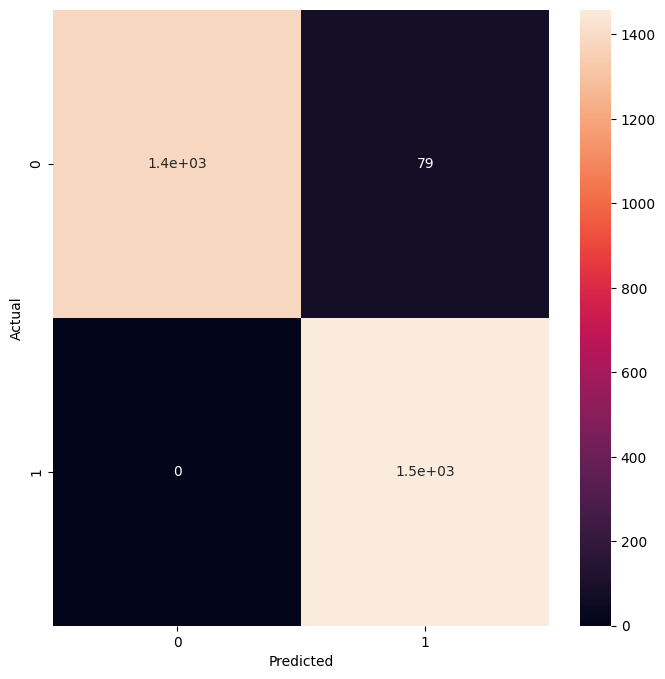

In [33]:
# KNN Classification and Report
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
confusion_knn = confusion_matrix(y_test, knn.predict(X_test))

plt.figure(figsize = (8, 8))
sns.heatmap(confusion_knn, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

print(classification_report(y_test, knn.predict(X_test)))

### SVC Model

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1458
           1       1.00      1.00      1.00      1458

    accuracy                           1.00      2916
   macro avg       1.00      1.00      1.00      2916
weighted avg       1.00      1.00      1.00      2916



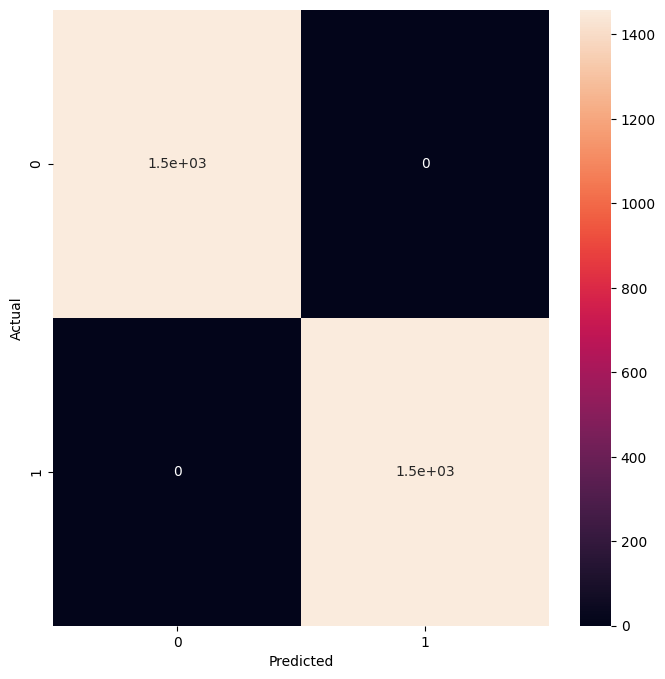

In [34]:
# SVC Classification and Report
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

rcv = RandomizedSearchCV(SVC(), param_grid, cv = 5)
rcv.fit(X_train, y_train)
y_pred_svc = rcv.predict(X_test)
confusion_svc = confusion_matrix(y_test, rcv.predict(X_test))

plt.figure(figsize = (8, 8))
sns.heatmap(confusion_svc, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

print(classification_report(y_test, y_pred_svc))

### Logistic Regression

              precision    recall  f1-score   support

           0       0.83      0.72      0.77      1458
           1       0.75      0.85      0.80      1458

    accuracy                           0.79      2916
   macro avg       0.79      0.79      0.78      2916
weighted avg       0.79      0.79      0.78      2916



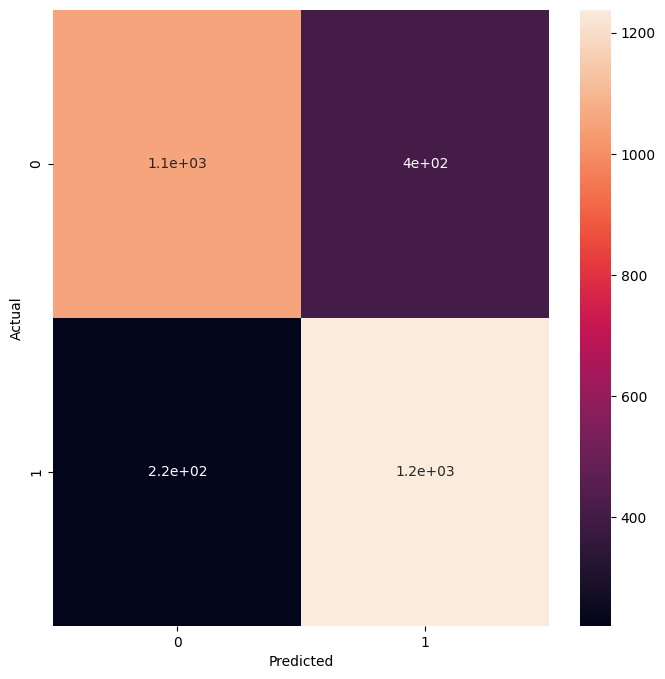

In [35]:
# LR Classification and Report
param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
            'max_iter': [50, 75, 100, 200, 300, 400, 500, 700]}

log = RandomizedSearchCV(LogisticRegression(solver = 'lbfgs'), param_grid, cv = 5)
log.fit(X_train, y_train)
y_pred_log = log.predict(X_test)
confusion_log = confusion_matrix(y_test, log.predict(X_test))

plt.figure(figsize = (8, 8))
sns.heatmap(confusion_log, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

print(classification_report(y_test, y_pred_log))

### Random Forest Classifier

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1458
           1       0.98      1.00      0.99      1458

    accuracy                           0.99      2916
   macro avg       0.99      0.99      0.99      2916
weighted avg       0.99      0.99      0.99      2916



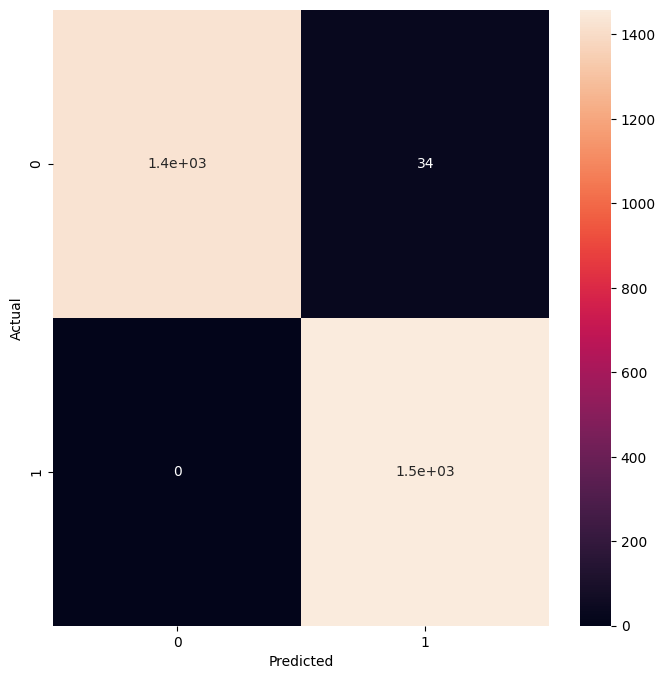

In [36]:
# RF Classification and Report
param_grid = {'n_estimators': [50, 75, 100, 150, 200, 300]}

rcv = RandomizedSearchCV(RandomForestClassifier(random_state = 42), param_grid, cv = 5)
rcv.fit(X_train, y_train)
y_pred_rcv = rcv.predict(X_test)
confusion_rcv = confusion_matrix(y_test, rcv.predict(X_test))

plt.figure(figsize = (8, 8))
sns.heatmap(confusion_rcv, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

print(classification_report(y_test, y_pred_rcv))

### Gradient Boosting Classifier

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1458
           1       0.94      1.00      0.97      1458

    accuracy                           0.97      2916
   macro avg       0.97      0.97      0.97      2916
weighted avg       0.97      0.97      0.97      2916



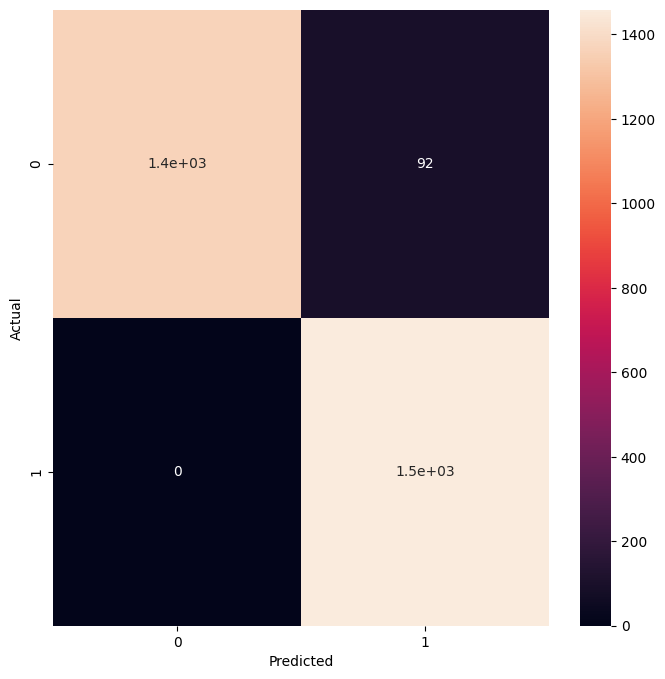

In [37]:
param_grid = {'learning_rate' : [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1],
              'n_estimators': [50, 75, 100, 150, 200, 300]}

gbc = RandomizedSearchCV(GradientBoostingClassifier(random_state = 42), param_grid, cv = 5)
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)
confusion_gbc = confusion_matrix(y_test, y_pred_gbc)

plt.figure(figsize = (8, 8))
sns.heatmap(confusion_gbc, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

print(classification_report(y_test, y_pred_gbc))

### LGBM Classifier

              precision    recall  f1-score   support

           0       1.00      0.91      0.95      1458
           1       0.92      1.00      0.96      1458

    accuracy                           0.96      2916
   macro avg       0.96      0.96      0.96      2916
weighted avg       0.96      0.96      0.96      2916



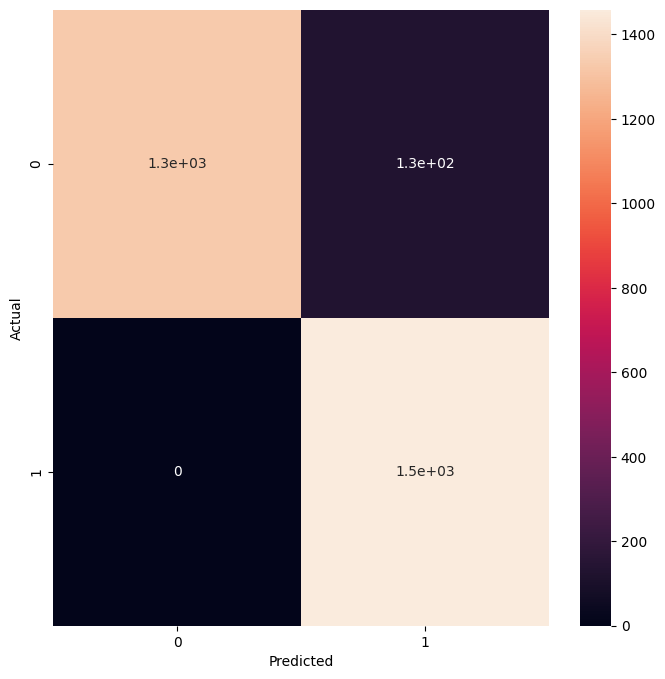

In [38]:
model = lgbm.LGBMClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (8, 8))
sns.heatmap(confusion, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

print(classification_report(y_test, y_pred))

## Conclusion

Support Vector Machine model gives the best accuracy and recall.
* Accuracy: 100%
* Recall: 100%